In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproductibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

In [6]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internaly computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
#         print('X.shape: ', X.shape)
        X = X.view(-1, 28 * 28).to(device)
#         print('Y.shape: ', Y.shape)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
#         print('before avg_cost:', avg_cost)
#         print('cost:', cost)
        avg_cost += (cost / total_batch)
#         print('after avg_cost:', avg_cost)
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: 0
cost: tensor(2.2600, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0038, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0038, grad_fn=<AddBackward0>)
cost: tensor(2.2326, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0075, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0075, grad_fn=<AddBackward0>)
cost: tensor(2.0726, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0109, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0109, grad_fn=<AddBackward0>)
cost: tensor(2.0282, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0143, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0143, grad_fn=<AddBackward0>)
cost: tens

before avg_cost: tensor(0.0847, grad_fn=<AddBackward0>)
cost: tensor(0.9687, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0863, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0863, grad_fn=<AddBackward0>)
cost: tensor(0.8921, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0878, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0878, grad_fn=<AddBackward0>)
cost: tensor(0.8438, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0892, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0892, grad_fn=<AddBackward0>)
cost: tensor(0.7582, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0904, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0904, grad_fn=<AddBackward0>)
cost: tensor(0.9717, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1395, grad_fn=<AddBackward0>)
cost: tensor(0.6906, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1406, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1406, grad_fn=<AddBackward0>)
cost: tensor(0.6609, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1417, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1417, grad_fn=<AddBackward0>)
cost: tensor(0.7811, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1430, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1430, grad_fn=<AddBackward0>)
cost: tensor(0.7136, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1442, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1442, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.5937, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1860, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1860, grad_fn=<AddBackward0>)
cost: tensor(0.6225, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1870, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1870, grad_fn=<AddBackward0>)
cost: tensor(0.5113, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1879, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1879, grad_fn=<AddBackward0>)
cost: tensor(0.6862, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1890, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1890, grad_fn=<AddBackward0>)
cost: tensor(0.5889, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1900, grad_fn=<AddBackw

before avg_cost: tensor(0.2208, grad_fn=<AddBackward0>)
cost: tensor(0.4716, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2216, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2216, grad_fn=<AddBackward0>)
cost: tensor(0.5251, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2225, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2225, grad_fn=<AddBackward0>)
cost: tensor(0.5610, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2234, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2234, grad_fn=<AddBackward0>)
cost: tensor(0.4964, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2243, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2243, grad_fn=<AddBackward0>)
cost: tensor(0.4859, grad_fn=<NllLossBac

before avg_cost: tensor(0.2582, grad_fn=<AddBackward0>)
cost: tensor(0.5350, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2591, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2591, grad_fn=<AddBackward0>)
cost: tensor(0.6030, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2601, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2601, grad_fn=<AddBackward0>)
cost: tensor(0.5947, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2611, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2611, grad_fn=<AddBackward0>)
cost: tensor(0.4163, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2618, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2618, grad_fn=<AddBackward0>)
cost: tensor(0.4065, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2910, grad_fn=<AddBackward0>)
cost: tensor(0.5402, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2919, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2919, grad_fn=<AddBackward0>)
cost: tensor(0.4908, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2927, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2927, grad_fn=<AddBackward0>)
cost: tensor(0.5338, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2936, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2936, grad_fn=<AddBackward0>)
cost: tensor(0.4425, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2944, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2944, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.3262, grad_fn=<AddBackward0>)
cost: tensor(0.4340, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3269, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3269, grad_fn=<AddBackward0>)
cost: tensor(0.4324, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3277, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3277, grad_fn=<AddBackward0>)
cost: tensor(0.4836, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3285, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3285, grad_fn=<AddBackward0>)
cost: tensor(0.3554, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3290, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3290, grad_fn=<AddBackward0>)
cost: tensor(0.4976, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3537, grad_fn=<AddBackward0>)
cost: tensor(0.4527, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3544, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3544, grad_fn=<AddBackward0>)
cost: tensor(0.2497, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3548, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3548, grad_fn=<AddBackward0>)
cost: tensor(0.4707, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3556, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3556, grad_fn=<AddBackward0>)
cost: tensor(0.5239, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3565, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.356

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3868, grad_fn=<AddBackward0>)
cost: tensor(0.5495, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3877, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3877, grad_fn=<AddBackward0>)
cost: tensor(0.5072, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3886, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3886, grad_fn=<AddBackward0>)
cost: tensor(0.3822, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3892, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3892, grad_fn=<AddBackward0>)
cost: tensor(0.2921, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3897, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3897, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4151, grad_fn=<AddBackward0>)
cost: tensor(0.4103, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4158, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4158, grad_fn=<AddBackward0>)
cost: tensor(0.4040, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4164, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4164, grad_fn=<AddBackward0>)
cost: tensor(0.3523, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4170, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4170, grad_fn=<AddBackward0>)
cost: tensor(0.3506, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4176, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4176, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4447, grad_fn=<AddBackward0>)
cost: tensor(0.3901, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4453, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4453, grad_fn=<AddBackward0>)
cost: tensor(0.3565, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4459, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4459, grad_fn=<AddBackward0>)
cost: tensor(0.4039, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4466, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4466, grad_fn=<AddBackward0>)
cost: tensor(0.4878, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4474, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.447

before avg_cost: tensor(0.4713, grad_fn=<AddBackward0>)
cost: tensor(0.4865, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4721, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4721, grad_fn=<AddBackward0>)
cost: tensor(0.3188, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4727, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4727, grad_fn=<AddBackward0>)
cost: tensor(0.4844, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4735, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4735, grad_fn=<AddBackward0>)
cost: tensor(0.3632, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.4741, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4741, grad_fn=<AddBackward0>)
cost: tensor(0.3178, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.4994, grad_fn=<AddBackward0>)
cost: tensor(0.4270, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5001, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5001, grad_fn=<AddBackward0>)
cost: tensor(0.4119, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5008, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5008, grad_fn=<AddBackward0>)
cost: tensor(0.4612, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5016, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5016, grad_fn=<AddBackward0>)
cost: tensor(0.3192, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5021, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5021, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.5307, grad_fn=<AddBackward0>)
cost: tensor(0.3261, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5313, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5313, grad_fn=<AddBackward0>)
cost: tensor(0.3184, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5318, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5318, grad_fn=<AddBackward0>)
cost: tensor(0.4797, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5326, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5326, grad_fn=<AddBackward0>)
cost: tensor(0.3337, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.5332, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.5332, grad_fn=<AddBackward0>)
cost: tensor(0.3599, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0213, grad_fn=<AddBackward0>)
cost: tensor(0.3040, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0218, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0218, grad_fn=<AddBackward0>)
cost: tensor(0.2619, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0222, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0222, grad_fn=<AddBackward0>)
cost: tensor(0.3216, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0228, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0228, grad_fn=<AddBackward0>)
cost: tensor(0.3762, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0234, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0234, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0489, grad_fn=<AddBackward0>)
cost: tensor(0.2759, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0494, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0494, grad_fn=<AddBackward0>)
cost: tensor(0.4599, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0501, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0501, grad_fn=<AddBackward0>)
cost: tensor(0.2677, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0506, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0506, grad_fn=<AddBackward0>)
cost: tensor(0.3201, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0511, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0511, grad_fn=<AddBackward0>)
cost: tensor(0.2557, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0731, grad_fn=<AddBackward0>)
cost: tensor(0.3514, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0737, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0737, grad_fn=<AddBackward0>)
cost: tensor(0.4241, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0744, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0744, grad_fn=<AddBackward0>)
cost: tensor(0.3606, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0750, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0750, grad_fn=<AddBackward0>)
cost: tensor(0.5177, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0758, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.075

after avg_cost: tensor(0.1039, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1039, grad_fn=<AddBackward0>)
cost: tensor(0.3531, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1045, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1045, grad_fn=<AddBackward0>)
cost: tensor(0.3813, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1051, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1051, grad_fn=<AddBackward0>)
cost: tensor(0.3613, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1057, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1057, grad_fn=<AddBackward0>)
cost: tensor(0.3331, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1063, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1308, grad_fn=<AddBackward0>)
cost: tensor(0.2642, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1312, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1312, grad_fn=<AddBackward0>)
cost: tensor(0.2936, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1317, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1317, grad_fn=<AddBackward0>)
cost: tensor(0.3675, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1323, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1323, grad_fn=<AddBackward0>)
cost: tensor(0.3880, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1330, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.133

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1591, grad_fn=<AddBackward0>)
cost: tensor(0.3235, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1597, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1597, grad_fn=<AddBackward0>)
cost: tensor(0.3298, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1602, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1602, grad_fn=<AddBackward0>)
cost: tensor(0.3935, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1609, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1609, grad_fn=<AddBackward0>)
cost: tensor(0.5007, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1617, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.161

before avg_cost: tensor(0.1850, grad_fn=<AddBackward0>)
cost: tensor(0.2475, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1854, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1854, grad_fn=<AddBackward0>)
cost: tensor(0.3127, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1860, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1860, grad_fn=<AddBackward0>)
cost: tensor(0.4271, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1867, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1867, grad_fn=<AddBackward0>)
cost: tensor(0.5165, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1875, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1875, grad_fn=<AddBackward0>)
cost: tensor(0.3991, grad_fn=<NllLossBac

before avg_cost: tensor(0.2126, grad_fn=<AddBackward0>)
cost: tensor(0.2991, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2131, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2131, grad_fn=<AddBackward0>)
cost: tensor(0.3099, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2136, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2136, grad_fn=<AddBackward0>)
cost: tensor(0.4024, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2143, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2143, grad_fn=<AddBackward0>)
cost: tensor(0.5511, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2152, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2152, grad_fn=<AddBackward0>)
cost: tensor(0.4352, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2407, grad_fn=<AddBackward0>)
cost: tensor(0.4550, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2415, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2415, grad_fn=<AddBackward0>)
cost: tensor(0.3290, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2420, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2420, grad_fn=<AddBackward0>)
cost: tensor(0.4826, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2428, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2428, grad_fn=<AddBackward0>)
cost: tensor(0.4798, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2436, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2436, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2674, grad_fn=<AddBackward0>)
cost: tensor(0.2548, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2678, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2678, grad_fn=<AddBackward0>)
cost: tensor(0.4937, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2686, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2686, grad_fn=<AddBackward0>)
cost: tensor(0.2943, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2691, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2691, grad_fn=<AddBackward0>)
cost: tensor(0.3043, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2696, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2696, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.2990, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2953, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2953, grad_fn=<AddBackward0>)
cost: tensor(0.3063, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2958, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2958, grad_fn=<AddBackward0>)
cost: tensor(0.3291, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2963, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2963, grad_fn=<AddBackward0>)
cost: tensor(0.2795, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2968, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2968, grad_fn=<AddBackward0>)
cost: tensor(0.5218, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2977, grad_fn=<AddBackw

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3153, grad_fn=<AddBackward0>)
cost: tensor(0.1785, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3156, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3156, grad_fn=<AddBackward0>)
cost: tensor(0.3137, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3161, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3161, grad_fn=<AddBackward0>)
cost: tensor(0.3843, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3167, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3167, grad_fn=<AddBackward0>)
cost: tensor(0.2832, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3172, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.317

cost: tensor(0.2544, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3387, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3387, grad_fn=<AddBackward0>)
cost: tensor(0.2530, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3392, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3392, grad_fn=<AddBackward0>)
cost: tensor(0.4643, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3399, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3399, grad_fn=<AddBackward0>)
cost: tensor(0.4791, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3407, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3407, grad_fn=<AddBackward0>)
cost: tensor(0.2504, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3412, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0071, grad_fn=<AddBackward0>)
cost: tensor(0.3054, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0076, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0076, grad_fn=<AddBackward0>)
cost: tensor(0.1854, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0079, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0079, grad_fn=<AddBackward0>)
cost: tensor(0.2729, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0083, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0083, grad_fn=<AddBackward0>)
cost: tensor(0.4729, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0091, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0091, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.3117, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0357, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0357, grad_fn=<AddBackward0>)
cost: tensor(0.3457, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0363, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0363, grad_fn=<AddBackward0>)
cost: tensor(0.2999, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0368, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0368, grad_fn=<AddBackward0>)
cost: tensor(0.3574, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0374, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0374, grad_fn=<AddBackward0>)
cost: tensor(0.5446, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0383, grad_fn=<AddBackw

before avg_cost: tensor(0.0597, grad_fn=<AddBackward0>)
cost: tensor(0.2639, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0602, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0602, grad_fn=<AddBackward0>)
cost: tensor(0.3638, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0608, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0608, grad_fn=<AddBackward0>)
cost: tensor(0.3892, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0614, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0614, grad_fn=<AddBackward0>)
cost: tensor(0.2964, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0619, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0619, grad_fn=<AddBackward0>)
cost: tensor(0.4403, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0833, grad_fn=<AddBackward0>)
cost: tensor(0.3038, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0838, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0838, grad_fn=<AddBackward0>)
cost: tensor(0.3565, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0844, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0844, grad_fn=<AddBackward0>)
cost: tensor(0.3534, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0850, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0850, grad_fn=<AddBackward0>)
cost: tensor(0.2747, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0854, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0854, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1048, grad_fn=<AddBackward0>)
cost: tensor(0.2782, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1053, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1053, grad_fn=<AddBackward0>)
cost: tensor(0.3478, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1058, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1058, grad_fn=<AddBackward0>)
cost: tensor(0.4231, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1065, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1065, grad_fn=<AddBackward0>)
cost: tensor(0.3054, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1070, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1070, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1298, grad_fn=<AddBackward0>)
cost: tensor(0.2800, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1303, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1303, grad_fn=<AddBackward0>)
cost: tensor(0.1948, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1306, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1306, grad_fn=<AddBackward0>)
cost: tensor(0.3260, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1311, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1311, grad_fn=<AddBackward0>)
cost: tensor(0.3354, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1317, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1317, grad_fn=<AddBackward0>)
cost: tensor

after avg_cost: tensor(0.1530, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1530, grad_fn=<AddBackward0>)
cost: tensor(0.2759, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1535, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1535, grad_fn=<AddBackward0>)
cost: tensor(0.3373, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1541, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1541, grad_fn=<AddBackward0>)
cost: tensor(0.3558, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1546, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1546, grad_fn=<AddBackward0>)
cost: tensor(0.5377, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1555, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1780, grad_fn=<AddBackward0>)
cost: tensor(0.4045, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1786, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1786, grad_fn=<AddBackward0>)
cost: tensor(0.3345, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1792, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1792, grad_fn=<AddBackward0>)
cost: tensor(0.3032, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1797, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1797, grad_fn=<AddBackward0>)
cost: tensor(0.2399, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1801, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1801, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.1984, grad_fn=<AddBackward0>)
cost: tensor(0.3620, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1990, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1990, grad_fn=<AddBackward0>)
cost: tensor(0.3119, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1996, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1996, grad_fn=<AddBackward0>)
cost: tensor(0.3450, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2001, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2001, grad_fn=<AddBackward0>)
cost: tensor(0.2504, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2005, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2005, grad_fn=<AddBackward0>)
cost: tensor(0.2695, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2219, grad_fn=<AddBackward0>)
cost: tensor(0.2100, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2223, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2223, grad_fn=<AddBackward0>)
cost: tensor(0.3495, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2229, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2229, grad_fn=<AddBackward0>)
cost: tensor(0.3423, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2234, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2234, grad_fn=<AddBackward0>)
cost: tensor(0.2853, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2239, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2239, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2429, grad_fn=<AddBackward0>)
cost: tensor(0.2310, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2433, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2433, grad_fn=<AddBackward0>)
cost: tensor(0.3318, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2439, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2439, grad_fn=<AddBackward0>)
cost: tensor(0.2880, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2443, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2443, grad_fn=<AddBackward0>)
cost: tensor(0.3212, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2449, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2449, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2661, grad_fn=<AddBackward0>)
cost: tensor(0.2457, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2665, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2665, grad_fn=<AddBackward0>)
cost: tensor(0.2096, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2669, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2669, grad_fn=<AddBackward0>)
cost: tensor(0.3841, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2675, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2675, grad_fn=<AddBackward0>)
cost: tensor(0.3256, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2681, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2681, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2859, grad_fn=<AddBackward0>)
cost: tensor(0.3006, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2864, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2864, grad_fn=<AddBackward0>)
cost: tensor(0.3557, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2870, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2870, grad_fn=<AddBackward0>)
cost: tensor(0.3327, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2876, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2876, grad_fn=<AddBackward0>)
cost: tensor(0.2585, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2880, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.288

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3075, grad_fn=<AddBackward0>)
cost: tensor(0.2878, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3080, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3080, grad_fn=<AddBackward0>)
cost: tensor(0.3758, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3086, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3086, grad_fn=<AddBackward0>)
cost: tensor(0.2851, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3091, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3091, grad_fn=<AddBackward0>)
cost: tensor(0.2435, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3095, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3095, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.3290, grad_fn=<AddBackward0>)
cost: tensor(0.2656, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3294, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3294, grad_fn=<AddBackward0>)
cost: tensor(0.3323, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3300, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3300, grad_fn=<AddBackward0>)
cost: tensor(0.3123, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3305, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3305, grad_fn=<AddBackward0>)
cost: tensor(0.3484, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3311, grad_fn=<AddBackward0>)
Epoch: 0003 cost = 0.331088215
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: 0
cost: tensor(0.4797, grad_fn=<NllLossBackward>

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0173, grad_fn=<AddBackward0>)
cost: tensor(0.1834, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0176, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0176, grad_fn=<AddBackward0>)
cost: tensor(0.2950, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0181, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0181, grad_fn=<AddBackward0>)
cost: tensor(0.2422, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0185, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0185, grad_fn=<AddBackward0>)
cost: tensor(0.3082, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0190, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0190, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0386, grad_fn=<AddBackward0>)
cost: tensor(0.2643, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0390, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0390, grad_fn=<AddBackward0>)
cost: tensor(0.3224, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0396, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0396, grad_fn=<AddBackward0>)
cost: tensor(0.2903, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0400, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0400, grad_fn=<AddBackward0>)
cost: tensor(0.3214, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0406, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0406, grad_fn=<AddBackward0>)
cost: tensor(0.3800, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0585, grad_fn=<AddBackward0>)
cost: tensor(0.3249, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0591, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0591, grad_fn=<AddBackward0>)
cost: tensor(0.2627, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0595, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0595, grad_fn=<AddBackward0>)
cost: tensor(0.3022, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0600, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0600, grad_fn=<AddBackward0>)
cost: tensor(0.3651, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0606, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0606, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0788, grad_fn=<AddBackward0>)
cost: tensor(0.3695, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0794, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0794, grad_fn=<AddBackward0>)
cost: tensor(0.3203, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0800, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0800, grad_fn=<AddBackward0>)
cost: tensor(0.2685, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0804, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0804, grad_fn=<AddBackward0>)
cost: tensor(0.2243, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0808, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0808, grad_fn=<AddBackward0>)
cost: tensor(0.2146, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1023, grad_fn=<AddBackward0>)
cost: tensor(0.3269, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1028, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1028, grad_fn=<AddBackward0>)
cost: tensor(0.5828, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1038, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1038, grad_fn=<AddBackward0>)
cost: tensor(0.4842, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1046, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1046, grad_fn=<AddBackward0>)
cost: tensor(0.3335, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1052, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.105

before avg_cost: tensor(0.1251, grad_fn=<AddBackward0>)
cost: tensor(0.3350, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1257, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1257, grad_fn=<AddBackward0>)
cost: tensor(0.3841, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1263, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1263, grad_fn=<AddBackward0>)
cost: tensor(0.2625, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1267, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1267, grad_fn=<AddBackward0>)
cost: tensor(0.1935, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1271, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1271, grad_fn=<AddBackward0>)
cost: tensor(0.4101, grad_fn=<NllLossBac

after avg_cost: tensor(0.1464, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1464, grad_fn=<AddBackward0>)
cost: tensor(0.3524, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1470, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1470, grad_fn=<AddBackward0>)
cost: tensor(0.4360, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1477, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1477, grad_fn=<AddBackward0>)
cost: tensor(0.2322, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1481, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1481, grad_fn=<AddBackward0>)
cost: tensor(0.3125, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1486, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

before avg_cost: tensor(0.1676, grad_fn=<AddBackward0>)
cost: tensor(0.3849, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1683, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1683, grad_fn=<AddBackward0>)
cost: tensor(0.3146, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1688, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1688, grad_fn=<AddBackward0>)
cost: tensor(0.3426, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1694, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1694, grad_fn=<AddBackward0>)
cost: tensor(0.2646, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1698, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1698, grad_fn=<AddBackward0>)
cost: tensor(0.3786, grad_fn=<NllLossBac

cost: tensor(0.3574, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1911, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1911, grad_fn=<AddBackward0>)
cost: tensor(0.2366, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1915, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1915, grad_fn=<AddBackward0>)
cost: tensor(0.4892, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1923, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1923, grad_fn=<AddBackward0>)
cost: tensor(0.2600, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1928, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1928, grad_fn=<AddBackward0>)
cost: tensor(0.3218, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1933, grad_fn=<AddBackw

cost: tensor(0.2745, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2114, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2114, grad_fn=<AddBackward0>)
cost: tensor(0.3233, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2120, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2120, grad_fn=<AddBackward0>)
cost: tensor(0.2226, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2123, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2123, grad_fn=<AddBackward0>)
cost: tensor(0.3541, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2129, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2129, grad_fn=<AddBackward0>)
cost: tensor(0.3044, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2134, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2321, grad_fn=<AddBackward0>)
cost: tensor(0.2085, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2324, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2324, grad_fn=<AddBackward0>)
cost: tensor(0.2976, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2329, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2329, grad_fn=<AddBackward0>)
cost: tensor(0.2399, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2333, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2333, grad_fn=<AddBackward0>)
cost: tensor(0.3370, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2339, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2339, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2516, grad_fn=<AddBackward0>)
cost: tensor(0.2246, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2520, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2520, grad_fn=<AddBackward0>)
cost: tensor(0.1991, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2523, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2523, grad_fn=<AddBackward0>)
cost: tensor(0.2362, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2527, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2527, grad_fn=<AddBackward0>)
cost: tensor(0.2743, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2532, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2532, grad_fn=<AddBackward0>)
cost: tensor(0.3584, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2736, grad_fn=<AddBackward0>)
cost: tensor(0.3917, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2742, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2742, grad_fn=<AddBackward0>)
cost: tensor(0.4089, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2749, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2749, grad_fn=<AddBackward0>)
cost: tensor(0.2859, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2754, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2754, grad_fn=<AddBackward0>)
cost: tensor(0.3793, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2760, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2760, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2951, grad_fn=<AddBackward0>)
cost: tensor(0.4032, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2958, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2958, grad_fn=<AddBackward0>)
cost: tensor(0.3631, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2964, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2964, grad_fn=<AddBackward0>)
cost: tensor(0.2971, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2969, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2969, grad_fn=<AddBackward0>)
cost: tensor(0.3061, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2974, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2974, grad_fn=<AddBackward0>)
cost: tensor(0.3343, grad_fn=<NllLossBac

before avg_cost: tensor(0.0027, grad_fn=<AddBackward0>)
cost: tensor(0.3366, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0033, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0033, grad_fn=<AddBackward0>)
cost: tensor(0.2458, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0037, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0037, grad_fn=<AddBackward0>)
cost: tensor(0.4150, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0044, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0044, grad_fn=<AddBackward0>)
cost: tensor(0.3536, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0049, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0049, grad_fn=<AddBackward0>)
cost: tensor(0.3984, grad_fn=<NllLossBac

before avg_cost: tensor(0.0226, grad_fn=<AddBackward0>)
cost: tensor(0.3218, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0231, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0231, grad_fn=<AddBackward0>)
cost: tensor(0.3013, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0236, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0236, grad_fn=<AddBackward0>)
cost: tensor(0.3088, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0241, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0241, grad_fn=<AddBackward0>)
cost: tensor(0.2470, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0245, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0245, grad_fn=<AddBackward0>)
cost: tensor(0.3265, grad_fn=<NllLossBac

before avg_cost: tensor(0.0420, grad_fn=<AddBackward0>)
cost: tensor(0.2710, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0424, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0424, grad_fn=<AddBackward0>)
cost: tensor(0.4366, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0431, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0431, grad_fn=<AddBackward0>)
cost: tensor(0.3368, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0437, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0437, grad_fn=<AddBackward0>)
cost: tensor(0.3111, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0442, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0442, grad_fn=<AddBackward0>)
cost: tensor(0.2620, grad_fn=<NllLossBac

cost: tensor(0.2779, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0651, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0651, grad_fn=<AddBackward0>)
cost: tensor(0.3504, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0657, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0657, grad_fn=<AddBackward0>)
cost: tensor(0.2816, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0661, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0661, grad_fn=<AddBackward0>)
cost: tensor(0.3261, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0667, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0667, grad_fn=<AddBackward0>)
cost: tensor(0.4158, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0674, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0841, grad_fn=<AddBackward0>)
cost: tensor(0.2904, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0846, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0846, grad_fn=<AddBackward0>)
cost: tensor(0.5114, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0854, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0854, grad_fn=<AddBackward0>)
cost: tensor(0.2322, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0858, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0858, grad_fn=<AddBackward0>)
cost: tensor(0.1866, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0861, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0861, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.3833, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1038, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1038, grad_fn=<AddBackward0>)
cost: tensor(0.4169, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1045, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1045, grad_fn=<AddBackward0>)
cost: tensor(0.2950, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1050, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1050, grad_fn=<AddBackward0>)
cost: tensor(0.4375, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1058, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1058, grad_fn=<AddBackward0>)
cost: tensor(0.3194, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1063, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1252, grad_fn=<AddBackward0>)
cost: tensor(0.2108, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1255, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1255, grad_fn=<AddBackward0>)
cost: tensor(0.4771, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1263, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1263, grad_fn=<AddBackward0>)
cost: tensor(0.2183, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1267, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1267, grad_fn=<AddBackward0>)
cost: tensor(0.2672, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1271, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1271, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1484, grad_fn=<AddBackward0>)
cost: tensor(0.2987, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1489, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1489, grad_fn=<AddBackward0>)
cost: tensor(0.3021, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1494, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1494, grad_fn=<AddBackward0>)
cost: tensor(0.2773, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1499, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1499, grad_fn=<AddBackward0>)
cost: tensor(0.2853, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1504, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1504, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1719, grad_fn=<AddBackward0>)
cost: tensor(0.2992, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1724, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1724, grad_fn=<AddBackward0>)
cost: tensor(0.3901, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1730, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1730, grad_fn=<AddBackward0>)
cost: tensor(0.2602, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1735, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1735, grad_fn=<AddBackward0>)
cost: tensor(0.2178, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1738, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.173

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1908, grad_fn=<AddBackward0>)
cost: tensor(0.3403, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1914, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1914, grad_fn=<AddBackward0>)
cost: tensor(0.2954, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1919, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1919, grad_fn=<AddBackward0>)
cost: tensor(0.3369, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1924, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1924, grad_fn=<AddBackward0>)
cost: tensor(0.5955, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1934, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.193

before avg_cost: tensor(0.2166, grad_fn=<AddBackward0>)
cost: tensor(0.2169, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2170, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2170, grad_fn=<AddBackward0>)
cost: tensor(0.3010, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2175, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2175, grad_fn=<AddBackward0>)
cost: tensor(0.4204, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2182, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2182, grad_fn=<AddBackward0>)
cost: tensor(0.2388, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2186, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2186, grad_fn=<AddBackward0>)
cost: tensor(0.3081, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2349, grad_fn=<AddBackward0>)
cost: tensor(0.2571, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2353, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2353, grad_fn=<AddBackward0>)
cost: tensor(0.3577, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2359, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2359, grad_fn=<AddBackward0>)
cost: tensor(0.3338, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2365, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2365, grad_fn=<AddBackward0>)
cost: tensor(0.2814, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2369, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2369, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.4602, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2542, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2542, grad_fn=<AddBackward0>)
cost: tensor(0.2963, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2547, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2547, grad_fn=<AddBackward0>)
cost: tensor(0.4002, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2554, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2554, grad_fn=<AddBackward0>)
cost: tensor(0.2115, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2557, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2557, grad_fn=<AddBackward0>)
cost: tensor(0.2004, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2561, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2754, grad_fn=<AddBackward0>)
cost: tensor(0.3570, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2760, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2760, grad_fn=<AddBackward0>)
cost: tensor(0.1365, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2762, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2762, grad_fn=<AddBackward0>)
cost: tensor(0.2471, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2767, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2767, grad_fn=<AddBackward0>)
cost: tensor(0.3700, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2773, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2773, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3002, grad_fn=<AddBackward0>)
cost: tensor(0.3334, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3008, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3008, grad_fn=<AddBackward0>)
cost: tensor(0.3153, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3013, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3013, grad_fn=<AddBackward0>)
cost: tensor(0.2590, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3017, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3017, grad_fn=<AddBackward0>)
cost: tensor(0.2659, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.3022, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.3022, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0114, grad_fn=<AddBackward0>)
cost: tensor(0.1977, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0117, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0117, grad_fn=<AddBackward0>)
cost: tensor(0.3038, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0122, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0122, grad_fn=<AddBackward0>)
cost: tensor(0.1575, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0125, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0125, grad_fn=<AddBackward0>)
cost: tensor(0.4394, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0132, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0132, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0359, grad_fn=<AddBackward0>)
cost: tensor(0.3297, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0364, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0364, grad_fn=<AddBackward0>)
cost: tensor(0.3537, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0370, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0370, grad_fn=<AddBackward0>)
cost: tensor(0.2709, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0375, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0375, grad_fn=<AddBackward0>)
cost: tensor(0.1813, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0378, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.037

before avg_cost: tensor(0.0544, grad_fn=<AddBackward0>)
cost: tensor(0.1984, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0547, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0547, grad_fn=<AddBackward0>)
cost: tensor(0.1560, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0550, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0550, grad_fn=<AddBackward0>)
cost: tensor(0.2921, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0555, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0555, grad_fn=<AddBackward0>)
cost: tensor(0.3832, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0561, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0561, grad_fn=<AddBackward0>)
cost: tensor(0.3745, grad_fn=<NllLossBac

before avg_cost: tensor(0.0748, grad_fn=<AddBackward0>)
cost: tensor(0.3052, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0753, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0753, grad_fn=<AddBackward0>)
cost: tensor(0.2552, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0758, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0758, grad_fn=<AddBackward0>)
cost: tensor(0.3490, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0763, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0763, grad_fn=<AddBackward0>)
cost: tensor(0.2996, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0768, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0768, grad_fn=<AddBackward0>)
cost: tensor(0.2951, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0941, grad_fn=<AddBackward0>)
cost: tensor(0.3157, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0946, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0946, grad_fn=<AddBackward0>)
cost: tensor(0.3352, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0951, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0951, grad_fn=<AddBackward0>)
cost: tensor(0.1551, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0954, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0954, grad_fn=<AddBackward0>)
cost: tensor(0.2591, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0958, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0958, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1123, grad_fn=<AddBackward0>)
cost: tensor(0.2807, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1127, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1127, grad_fn=<AddBackward0>)
cost: tensor(0.2783, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1132, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1132, grad_fn=<AddBackward0>)
cost: tensor(0.2690, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1136, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1136, grad_fn=<AddBackward0>)
cost: tensor(0.2967, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1141, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.114

before avg_cost: tensor(0.1299, grad_fn=<AddBackward0>)
cost: tensor(0.3889, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1306, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1306, grad_fn=<AddBackward0>)
cost: tensor(0.3410, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1311, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1311, grad_fn=<AddBackward0>)
cost: tensor(0.3995, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1318, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1318, grad_fn=<AddBackward0>)
cost: tensor(0.3408, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1324, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1324, grad_fn=<AddBackward0>)
cost: tensor(0.4007, grad_fn=<NllLossBac

before avg_cost: tensor(0.1499, grad_fn=<AddBackward0>)
cost: tensor(0.2031, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1502, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1502, grad_fn=<AddBackward0>)
cost: tensor(0.2481, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1506, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1506, grad_fn=<AddBackward0>)
cost: tensor(0.4474, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1514, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1514, grad_fn=<AddBackward0>)
cost: tensor(0.2854, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1519, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1519, grad_fn=<AddBackward0>)
cost: tensor(0.3823, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1688, grad_fn=<AddBackward0>)
cost: tensor(0.2289, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1692, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1692, grad_fn=<AddBackward0>)
cost: tensor(0.2586, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1696, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1696, grad_fn=<AddBackward0>)
cost: tensor(0.4283, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1703, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1703, grad_fn=<AddBackward0>)
cost: tensor(0.2541, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1707, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.170

before avg_cost: tensor(0.1883, grad_fn=<AddBackward0>)
cost: tensor(0.3214, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1889, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1889, grad_fn=<AddBackward0>)
cost: tensor(0.3691, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1895, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1895, grad_fn=<AddBackward0>)
cost: tensor(0.1873, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1898, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1898, grad_fn=<AddBackward0>)
cost: tensor(0.2022, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1901, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1901, grad_fn=<AddBackward0>)
cost: tensor(0.2675, grad_fn=<NllLossBac

cost: tensor(0.4445, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2085, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2085, grad_fn=<AddBackward0>)
cost: tensor(0.2491, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2089, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2089, grad_fn=<AddBackward0>)
cost: tensor(0.2321, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2093, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2093, grad_fn=<AddBackward0>)
cost: tensor(0.3863, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2100, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2100, grad_fn=<AddBackward0>)
cost: tensor(0.2461, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2104, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2325, grad_fn=<AddBackward0>)
cost: tensor(0.2557, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2330, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2330, grad_fn=<AddBackward0>)
cost: tensor(0.1845, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2333, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2333, grad_fn=<AddBackward0>)
cost: tensor(0.2230, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2337, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2337, grad_fn=<AddBackward0>)
cost: tensor(0.3737, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2343, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2343, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2499, grad_fn=<AddBackward0>)
cost: tensor(0.2870, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2504, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2504, grad_fn=<AddBackward0>)
cost: tensor(0.3007, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2509, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2509, grad_fn=<AddBackward0>)
cost: tensor(0.2085, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2512, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2512, grad_fn=<AddBackward0>)
cost: tensor(0.2856, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2517, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.251

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2732, grad_fn=<AddBackward0>)
cost: tensor(0.2673, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2737, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2737, grad_fn=<AddBackward0>)
cost: tensor(0.2942, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2742, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2742, grad_fn=<AddBackward0>)
cost: tensor(0.3613, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2748, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2748, grad_fn=<AddBackward0>)
cost: tensor(0.2456, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2752, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2752, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2956, grad_fn=<AddBackward0>)
cost: tensor(0.3886, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2963, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2963, grad_fn=<AddBackward0>)
cost: tensor(0.3572, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2968, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2968, grad_fn=<AddBackward0>)
cost: tensor(0.3395, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2974, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2974, grad_fn=<AddBackward0>)
cost: tensor(0.2129, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2978, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2978, grad_fn=<AddBackward0>)
cost: tensor

after avg_cost: tensor(0.0128, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0128, grad_fn=<AddBackward0>)
cost: tensor(0.3856, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0135, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0135, grad_fn=<AddBackward0>)
cost: tensor(0.2525, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0139, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0139, grad_fn=<AddBackward0>)
cost: tensor(0.2049, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0143, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0143, grad_fn=<AddBackward0>)
cost: tensor(0.2489, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0147, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

before avg_cost: tensor(0.0379, grad_fn=<AddBackward0>)
cost: tensor(0.2837, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0384, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0384, grad_fn=<AddBackward0>)
cost: tensor(0.2385, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0388, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0388, grad_fn=<AddBackward0>)
cost: tensor(0.2309, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0392, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0392, grad_fn=<AddBackward0>)
cost: tensor(0.1908, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0395, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0395, grad_fn=<AddBackward0>)
cost: tensor(0.2537, grad_fn=<NllLossBac

cost: tensor(0.2851, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0562, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0562, grad_fn=<AddBackward0>)
cost: tensor(0.4784, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0570, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0570, grad_fn=<AddBackward0>)
cost: tensor(0.4176, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0577, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0577, grad_fn=<AddBackward0>)
cost: tensor(0.4319, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0584, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0584, grad_fn=<AddBackward0>)
cost: tensor(0.3051, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0589, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0788, grad_fn=<AddBackward0>)
cost: tensor(0.1138, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0790, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0790, grad_fn=<AddBackward0>)
cost: tensor(0.4580, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0798, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0798, grad_fn=<AddBackward0>)
cost: tensor(0.1827, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0801, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0801, grad_fn=<AddBackward0>)
cost: tensor(0.2479, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0805, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0805, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0999, grad_fn=<AddBackward0>)
cost: tensor(0.4007, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1006, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1006, grad_fn=<AddBackward0>)
cost: tensor(0.2958, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1011, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1011, grad_fn=<AddBackward0>)
cost: tensor(0.2791, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1015, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1015, grad_fn=<AddBackward0>)
cost: tensor(0.2218, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1019, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1019, grad_fn=<AddBackward0>)
cost: tensor(0.2600, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1165, grad_fn=<AddBackward0>)
cost: tensor(0.3581, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1171, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1171, grad_fn=<AddBackward0>)
cost: tensor(0.2065, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1175, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1175, grad_fn=<AddBackward0>)
cost: tensor(0.2690, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1179, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1179, grad_fn=<AddBackward0>)
cost: tensor(0.3045, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1184, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1184, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.2858, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1385, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1385, grad_fn=<AddBackward0>)
cost: tensor(0.3490, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1391, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1391, grad_fn=<AddBackward0>)
cost: tensor(0.1865, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1394, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1394, grad_fn=<AddBackward0>)
cost: tensor(0.4447, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1401, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1401, grad_fn=<AddBackward0>)
cost: tensor(0.2432, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1405, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1571, grad_fn=<AddBackward0>)
cost: tensor(0.4056, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1578, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1578, grad_fn=<AddBackward0>)
cost: tensor(0.3687, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1584, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1584, grad_fn=<AddBackward0>)
cost: tensor(0.4762, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1592, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1592, grad_fn=<AddBackward0>)
cost: tensor(0.2467, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1596, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1596, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1805, grad_fn=<AddBackward0>)
cost: tensor(0.2729, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1810, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1810, grad_fn=<AddBackward0>)
cost: tensor(0.3812, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1816, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1816, grad_fn=<AddBackward0>)
cost: tensor(0.4227, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1823, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1823, grad_fn=<AddBackward0>)
cost: tensor(0.5584, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1833, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1833, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2043, grad_fn=<AddBackward0>)
cost: tensor(0.2069, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2046, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2046, grad_fn=<AddBackward0>)
cost: tensor(0.1852, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2049, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2049, grad_fn=<AddBackward0>)
cost: tensor(0.3112, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2055, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2055, grad_fn=<AddBackward0>)
cost: tensor(0.3134, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2060, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2060, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2225, grad_fn=<AddBackward0>)
cost: tensor(0.2941, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2230, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2230, grad_fn=<AddBackward0>)
cost: tensor(0.2658, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2235, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2235, grad_fn=<AddBackward0>)
cost: tensor(0.4113, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2242, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2242, grad_fn=<AddBackward0>)
cost: tensor(0.2785, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2246, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2246, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2457, grad_fn=<AddBackward0>)
cost: tensor(0.1916, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2460, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2460, grad_fn=<AddBackward0>)
cost: tensor(0.3199, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2465, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2465, grad_fn=<AddBackward0>)
cost: tensor(0.2608, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2470, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2470, grad_fn=<AddBackward0>)
cost: tensor(0.2608, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2474, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2474, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2687, grad_fn=<AddBackward0>)
cost: tensor(0.2082, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2691, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2691, grad_fn=<AddBackward0>)
cost: tensor(0.2665, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2695, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2695, grad_fn=<AddBackward0>)
cost: tensor(0.2299, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2699, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2699, grad_fn=<AddBackward0>)
cost: tensor(0.2928, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2704, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2704, grad_fn=<AddBackward0>)
cost: tensor(0.3757, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2877, grad_fn=<AddBackward0>)
cost: tensor(0.2868, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2882, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2882, grad_fn=<AddBackward0>)
cost: tensor(0.3489, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2888, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2888, grad_fn=<AddBackward0>)
cost: tensor(0.2751, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2892, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2892, grad_fn=<AddBackward0>)
cost: tensor(0.3899, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2899, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.289

cost: tensor(0.2085, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0148, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0148, grad_fn=<AddBackward0>)
cost: tensor(0.2683, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0152, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0152, grad_fn=<AddBackward0>)
cost: tensor(0.3011, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0157, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0157, grad_fn=<AddBackward0>)
cost: tensor(0.2563, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0162, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0162, grad_fn=<AddBackward0>)
cost: tensor(0.2932, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0166, grad_fn=<AddBackw

before avg_cost: tensor(0.0340, grad_fn=<AddBackward0>)
cost: tensor(0.2616, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0344, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0344, grad_fn=<AddBackward0>)
cost: tensor(0.3630, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0350, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0350, grad_fn=<AddBackward0>)
cost: tensor(0.2512, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0354, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0354, grad_fn=<AddBackward0>)
cost: tensor(0.4183, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0361, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0361, grad_fn=<AddBackward0>)
cost: tensor(0.4528, grad_fn=<NllLossBac

before avg_cost: tensor(0.0553, grad_fn=<AddBackward0>)
cost: tensor(0.2187, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0556, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0556, grad_fn=<AddBackward0>)
cost: tensor(0.1862, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0559, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0559, grad_fn=<AddBackward0>)
cost: tensor(0.4632, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0567, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0567, grad_fn=<AddBackward0>)
cost: tensor(0.3168, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0572, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0572, grad_fn=<AddBackward0>)
cost: tensor(0.2267, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0754, grad_fn=<AddBackward0>)
cost: tensor(0.2588, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0758, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0758, grad_fn=<AddBackward0>)
cost: tensor(0.1884, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0761, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0761, grad_fn=<AddBackward0>)
cost: tensor(0.3887, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0768, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0768, grad_fn=<AddBackward0>)
cost: tensor(0.2287, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0771, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0771, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0966, grad_fn=<AddBackward0>)
cost: tensor(0.3967, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0973, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0973, grad_fn=<AddBackward0>)
cost: tensor(0.2720, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0977, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0977, grad_fn=<AddBackward0>)
cost: tensor(0.2071, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0981, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0981, grad_fn=<AddBackward0>)
cost: tensor(0.4845, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0989, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0989, grad_fn=<AddBackward0>)
cost: tensor(0.3345, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1153, grad_fn=<AddBackward0>)
cost: tensor(0.2461, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1157, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1157, grad_fn=<AddBackward0>)
cost: tensor(0.2669, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1162, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1162, grad_fn=<AddBackward0>)
cost: tensor(0.3322, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1167, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1167, grad_fn=<AddBackward0>)
cost: tensor(0.3434, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1173, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.117

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1346, grad_fn=<AddBackward0>)
cost: tensor(0.3242, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1351, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1351, grad_fn=<AddBackward0>)
cost: tensor(0.2584, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1355, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1355, grad_fn=<AddBackward0>)
cost: tensor(0.3740, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1362, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1362, grad_fn=<AddBackward0>)
cost: tensor(0.2059, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1365, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1365, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1537, grad_fn=<AddBackward0>)
cost: tensor(0.1998, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1540, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1540, grad_fn=<AddBackward0>)
cost: tensor(0.1585, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1543, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1543, grad_fn=<AddBackward0>)
cost: tensor(0.2211, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1546, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1546, grad_fn=<AddBackward0>)
cost: tensor(0.2284, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1550, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.155

after avg_cost: tensor(0.1751, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1751, grad_fn=<AddBackward0>)
cost: tensor(0.2316, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1755, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1755, grad_fn=<AddBackward0>)
cost: tensor(0.2021, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1758, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1758, grad_fn=<AddBackward0>)
cost: tensor(0.3438, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1764, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1764, grad_fn=<AddBackward0>)
cost: tensor(0.2076, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1767, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

before avg_cost: tensor(0.1933, grad_fn=<AddBackward0>)
cost: tensor(0.2998, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1938, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1938, grad_fn=<AddBackward0>)
cost: tensor(0.2667, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1943, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1943, grad_fn=<AddBackward0>)
cost: tensor(0.1852, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1946, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1946, grad_fn=<AddBackward0>)
cost: tensor(0.3090, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1951, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1951, grad_fn=<AddBackward0>)
cost: tensor(0.3611, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2140, grad_fn=<AddBackward0>)
cost: tensor(0.2600, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2144, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2144, grad_fn=<AddBackward0>)
cost: tensor(0.2275, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2148, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2148, grad_fn=<AddBackward0>)
cost: tensor(0.2929, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2153, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2153, grad_fn=<AddBackward0>)
cost: tensor(0.2338, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2156, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2156, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.1898, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2331, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2331, grad_fn=<AddBackward0>)
cost: tensor(0.3574, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2337, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2337, grad_fn=<AddBackward0>)
cost: tensor(0.3370, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2342, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2342, grad_fn=<AddBackward0>)
cost: tensor(0.3063, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2347, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2347, grad_fn=<AddBackward0>)
cost: tensor(0.2850, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2352, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2555, grad_fn=<AddBackward0>)
cost: tensor(0.2398, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2559, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2559, grad_fn=<AddBackward0>)
cost: tensor(0.2227, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2563, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2563, grad_fn=<AddBackward0>)
cost: tensor(0.3254, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2568, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2568, grad_fn=<AddBackward0>)
cost: tensor(0.2612, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2572, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2572, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2733, grad_fn=<AddBackward0>)
cost: tensor(0.3009, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2738, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2738, grad_fn=<AddBackward0>)
cost: tensor(0.1727, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2741, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2741, grad_fn=<AddBackward0>)
cost: tensor(0.4450, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2748, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2748, grad_fn=<AddBackward0>)
cost: tensor(0.3603, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2754, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2754, grad_fn=<AddBackward0>)
cost: tensor(0.2012, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0015, grad_fn=<AddBackward0>)
cost: tensor(0.2091, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0019, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0019, grad_fn=<AddBackward0>)
cost: tensor(0.2811, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0023, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0023, grad_fn=<AddBackward0>)
cost: tensor(0.2867, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0028, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0028, grad_fn=<AddBackward0>)
cost: tensor(0.4421, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0035, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0035, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0212, grad_fn=<AddBackward0>)
cost: tensor(0.1937, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0216, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0216, grad_fn=<AddBackward0>)
cost: tensor(0.1883, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0219, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0219, grad_fn=<AddBackward0>)
cost: tensor(0.2594, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0223, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0223, grad_fn=<AddBackward0>)
cost: tensor(0.3003, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0228, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.022

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0406, grad_fn=<AddBackward0>)
cost: tensor(0.4227, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0413, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0413, grad_fn=<AddBackward0>)
cost: tensor(0.3650, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0419, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0419, grad_fn=<AddBackward0>)
cost: tensor(0.2283, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0423, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0423, grad_fn=<AddBackward0>)
cost: tensor(0.1837, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0426, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0426, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0589, grad_fn=<AddBackward0>)
cost: tensor(0.3314, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0595, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0595, grad_fn=<AddBackward0>)
cost: tensor(0.4034, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0601, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0601, grad_fn=<AddBackward0>)
cost: tensor(0.3414, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0607, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0607, grad_fn=<AddBackward0>)
cost: tensor(0.3158, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0612, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0612, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0770, grad_fn=<AddBackward0>)
cost: tensor(0.3882, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0776, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0776, grad_fn=<AddBackward0>)
cost: tensor(0.1995, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0780, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0780, grad_fn=<AddBackward0>)
cost: tensor(0.3642, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0786, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0786, grad_fn=<AddBackward0>)
cost: tensor(0.4209, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0793, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0793, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0973, grad_fn=<AddBackward0>)
cost: tensor(0.2751, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0977, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0977, grad_fn=<AddBackward0>)
cost: tensor(0.2935, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0982, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0982, grad_fn=<AddBackward0>)
cost: tensor(0.1911, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0985, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0985, grad_fn=<AddBackward0>)
cost: tensor(0.2852, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0990, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0990, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1149, grad_fn=<AddBackward0>)
cost: tensor(0.3125, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1154, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1154, grad_fn=<AddBackward0>)
cost: tensor(0.2796, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1159, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1159, grad_fn=<AddBackward0>)
cost: tensor(0.1896, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1162, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1162, grad_fn=<AddBackward0>)
cost: tensor(0.3011, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1167, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.116

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1375, grad_fn=<AddBackward0>)
cost: tensor(0.2157, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1378, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1378, grad_fn=<AddBackward0>)
cost: tensor(0.3100, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1383, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1383, grad_fn=<AddBackward0>)
cost: tensor(0.2074, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1387, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1387, grad_fn=<AddBackward0>)
cost: tensor(0.2596, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1391, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1391, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1569, grad_fn=<AddBackward0>)
cost: tensor(0.1966, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1572, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1572, grad_fn=<AddBackward0>)
cost: tensor(0.1719, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1575, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1575, grad_fn=<AddBackward0>)
cost: tensor(0.2783, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1580, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1580, grad_fn=<AddBackward0>)
cost: tensor(0.3577, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1586, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1586, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.1768, grad_fn=<AddBackward0>)
cost: tensor(0.4449, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1776, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1776, grad_fn=<AddBackward0>)
cost: tensor(0.3065, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1781, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1781, grad_fn=<AddBackward0>)
cost: tensor(0.3066, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1786, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1786, grad_fn=<AddBackward0>)
cost: tensor(0.1929, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1789, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1789, grad_fn=<AddBackward0>)
cost: tensor(0.3968, grad_fn=<NllLossBac

after avg_cost: tensor(0.1958, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1958, grad_fn=<AddBackward0>)
cost: tensor(0.1374, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1960, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1960, grad_fn=<AddBackward0>)
cost: tensor(0.1885, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1963, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1963, grad_fn=<AddBackward0>)
cost: tensor(0.1984, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1967, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1967, grad_fn=<AddBackward0>)
cost: tensor(0.3381, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1972, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2178, grad_fn=<AddBackward0>)
cost: tensor(0.3150, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2184, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2184, grad_fn=<AddBackward0>)
cost: tensor(0.2265, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2187, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2187, grad_fn=<AddBackward0>)
cost: tensor(0.1706, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2190, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2190, grad_fn=<AddBackward0>)
cost: tensor(0.2112, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2194, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2194, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2351, grad_fn=<AddBackward0>)
cost: tensor(0.3117, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2357, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2357, grad_fn=<AddBackward0>)
cost: tensor(0.2979, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2362, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2362, grad_fn=<AddBackward0>)
cost: tensor(0.1836, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2365, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2365, grad_fn=<AddBackward0>)
cost: tensor(0.2894, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2369, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2369, grad_fn=<AddBackward0>)
cost: tensor(0.3342, grad_fn=<NllLossBac

after avg_cost: tensor(0.2551, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2551, grad_fn=<AddBackward0>)
cost: tensor(0.2820, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2555, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2555, grad_fn=<AddBackward0>)
cost: tensor(0.2313, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2559, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2559, grad_fn=<AddBackward0>)
cost: tensor(0.2621, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2564, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2564, grad_fn=<AddBackward0>)
cost: tensor(0.2729, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2568, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

before avg_cost: tensor(0.2733, grad_fn=<AddBackward0>)
cost: tensor(0.4930, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2741, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2741, grad_fn=<AddBackward0>)
cost: tensor(0.2665, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2745, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2745, grad_fn=<AddBackward0>)
cost: tensor(0.3336, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2751, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2751, grad_fn=<AddBackward0>)
cost: tensor(0.5198, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2759, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2759, grad_fn=<AddBackward0>)
cost: tensor(0.3780, grad_fn=<NllLossBac

after avg_cost: tensor(0.0054, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0054, grad_fn=<AddBackward0>)
cost: tensor(0.3331, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0059, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0059, grad_fn=<AddBackward0>)
cost: tensor(0.3048, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0064, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0064, grad_fn=<AddBackward0>)
cost: tensor(0.4458, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0072, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0072, grad_fn=<AddBackward0>)
cost: tensor(0.2578, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0076, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

after avg_cost: tensor(0.0246, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0246, grad_fn=<AddBackward0>)
cost: tensor(0.2103, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0250, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0250, grad_fn=<AddBackward0>)
cost: tensor(0.2108, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0253, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0253, grad_fn=<AddBackward0>)
cost: tensor(0.2061, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0257, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0257, grad_fn=<AddBackward0>)
cost: tensor(0.3365, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0262, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0400, grad_fn=<AddBackward0>)
cost: tensor(0.2603, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0405, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0405, grad_fn=<AddBackward0>)
cost: tensor(0.4655, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0412, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0412, grad_fn=<AddBackward0>)
cost: tensor(0.3011, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0417, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0417, grad_fn=<AddBackward0>)
cost: tensor(0.2890, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0422, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0422, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0590, grad_fn=<AddBackward0>)
cost: tensor(0.2711, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0594, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0594, grad_fn=<AddBackward0>)
cost: tensor(0.2889, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0599, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0599, grad_fn=<AddBackward0>)
cost: tensor(0.1574, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0602, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0602, grad_fn=<AddBackward0>)
cost: tensor(0.2615, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0606, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.060

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0769, grad_fn=<AddBackward0>)
cost: tensor(0.3010, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0774, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0774, grad_fn=<AddBackward0>)
cost: tensor(0.3303, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0779, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0779, grad_fn=<AddBackward0>)
cost: tensor(0.1857, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0782, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0782, grad_fn=<AddBackward0>)
cost: tensor(0.3367, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0788, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0788, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.3355, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0989, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0989, grad_fn=<AddBackward0>)
cost: tensor(0.3679, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0995, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0995, grad_fn=<AddBackward0>)
cost: tensor(0.3027, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1000, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1000, grad_fn=<AddBackward0>)
cost: tensor(0.2202, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1004, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1004, grad_fn=<AddBackward0>)
cost: tensor(0.3148, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1009, grad_fn=<AddBackw

before avg_cost: tensor(0.1181, grad_fn=<AddBackward0>)
cost: tensor(0.3931, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1188, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1188, grad_fn=<AddBackward0>)
cost: tensor(0.3063, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1193, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1193, grad_fn=<AddBackward0>)
cost: tensor(0.1654, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1196, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1196, grad_fn=<AddBackward0>)
cost: tensor(0.2175, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1199, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1199, grad_fn=<AddBackward0>)
cost: tensor(0.2560, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1374, grad_fn=<AddBackward0>)
cost: tensor(0.1858, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1377, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1377, grad_fn=<AddBackward0>)
cost: tensor(0.2092, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1381, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1381, grad_fn=<AddBackward0>)
cost: tensor(0.2461, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1385, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1385, grad_fn=<AddBackward0>)
cost: tensor(0.6202, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1395, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.139

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1584, grad_fn=<AddBackward0>)
cost: tensor(0.2298, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1588, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1588, grad_fn=<AddBackward0>)
cost: tensor(0.2091, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1592, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1592, grad_fn=<AddBackward0>)
cost: tensor(0.3642, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1598, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1598, grad_fn=<AddBackward0>)
cost: tensor(0.2001, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1601, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1601, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1805, grad_fn=<AddBackward0>)
cost: tensor(0.2663, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1809, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1809, grad_fn=<AddBackward0>)
cost: tensor(0.2274, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1813, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1813, grad_fn=<AddBackward0>)
cost: tensor(0.3208, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1819, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1819, grad_fn=<AddBackward0>)
cost: tensor(0.2179, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1822, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.182

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1992, grad_fn=<AddBackward0>)
cost: tensor(0.3318, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1997, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1997, grad_fn=<AddBackward0>)
cost: tensor(0.1783, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2000, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2000, grad_fn=<AddBackward0>)
cost: tensor(0.3918, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2007, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2007, grad_fn=<AddBackward0>)
cost: tensor(0.2099, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2010, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2010, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2198, grad_fn=<AddBackward0>)
cost: tensor(0.3104, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2203, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2203, grad_fn=<AddBackward0>)
cost: tensor(0.1174, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2205, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2205, grad_fn=<AddBackward0>)
cost: tensor(0.3868, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2212, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2212, grad_fn=<AddBackward0>)
cost: tensor(0.2120, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2215, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2215, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2404, grad_fn=<AddBackward0>)
cost: tensor(0.1685, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2406, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2406, grad_fn=<AddBackward0>)
cost: tensor(0.3950, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2413, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2413, grad_fn=<AddBackward0>)
cost: tensor(0.4057, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2420, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2420, grad_fn=<AddBackward0>)
cost: tensor(0.2691, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2424, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2424, grad_fn=<AddBackward0>)
cost: tensor(0.2520, grad_fn=<NllLossBac

before avg_cost: tensor(0.2592, grad_fn=<AddBackward0>)
cost: tensor(0.3347, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2598, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2598, grad_fn=<AddBackward0>)
cost: tensor(0.2624, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2602, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2602, grad_fn=<AddBackward0>)
cost: tensor(0.2699, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2607, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2607, grad_fn=<AddBackward0>)
cost: tensor(0.4176, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2614, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2614, grad_fn=<AddBackward0>)
cost: tensor(0.4077, grad_fn=<NllLossBac

before avg_cost: tensor(0.2776, grad_fn=<AddBackward0>)
cost: tensor(0.3065, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2781, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2781, grad_fn=<AddBackward0>)
cost: tensor(0.2755, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2785, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2785, grad_fn=<AddBackward0>)
cost: tensor(0.2153, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2789, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2789, grad_fn=<AddBackward0>)
cost: tensor(0.3216, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2794, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2794, grad_fn=<AddBackward0>)
cost: tensor(0.3218, grad_fn=<NllLossBac

before avg_cost: tensor(0.0118, grad_fn=<AddBackward0>)
cost: tensor(0.3572, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0124, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0124, grad_fn=<AddBackward0>)
cost: tensor(0.1660, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0127, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0127, grad_fn=<AddBackward0>)
cost: tensor(0.3497, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0133, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0133, grad_fn=<AddBackward0>)
cost: tensor(0.2616, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0137, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0137, grad_fn=<AddBackward0>)
cost: tensor(0.1743, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0295, grad_fn=<AddBackward0>)
cost: tensor(0.2696, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0300, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0300, grad_fn=<AddBackward0>)
cost: tensor(0.2702, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0304, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0304, grad_fn=<AddBackward0>)
cost: tensor(0.3303, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0310, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0310, grad_fn=<AddBackward0>)
cost: tensor(0.2376, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0314, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0314, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0501, grad_fn=<AddBackward0>)
cost: tensor(0.4710, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0508, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0508, grad_fn=<AddBackward0>)
cost: tensor(0.3288, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0514, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0514, grad_fn=<AddBackward0>)
cost: tensor(0.2015, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0517, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0517, grad_fn=<AddBackward0>)
cost: tensor(0.3383, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0523, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0523, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0722, grad_fn=<AddBackward0>)
cost: tensor(0.2368, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0726, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0726, grad_fn=<AddBackward0>)
cost: tensor(0.3384, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0732, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0732, grad_fn=<AddBackward0>)
cost: tensor(0.4993, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0740, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0740, grad_fn=<AddBackward0>)
cost: tensor(0.1808, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0743, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0743, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0919, grad_fn=<AddBackward0>)
cost: tensor(0.2733, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0923, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0923, grad_fn=<AddBackward0>)
cost: tensor(0.3454, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0929, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0929, grad_fn=<AddBackward0>)
cost: tensor(0.3377, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0935, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0935, grad_fn=<AddBackward0>)
cost: tensor(0.3109, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0940, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0940, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1096, grad_fn=<AddBackward0>)
cost: tensor(0.3326, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1102, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1102, grad_fn=<AddBackward0>)
cost: tensor(0.2308, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1106, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1106, grad_fn=<AddBackward0>)
cost: tensor(0.2544, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1110, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1110, grad_fn=<AddBackward0>)
cost: tensor(0.3093, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1115, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1115, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1304, grad_fn=<AddBackward0>)
cost: tensor(0.3302, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1309, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1309, grad_fn=<AddBackward0>)
cost: tensor(0.3503, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1315, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1315, grad_fn=<AddBackward0>)
cost: tensor(0.2348, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1319, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1319, grad_fn=<AddBackward0>)
cost: tensor(0.1912, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1322, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.132

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1487, grad_fn=<AddBackward0>)
cost: tensor(0.3315, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1493, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1493, grad_fn=<AddBackward0>)
cost: tensor(0.4670, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1501, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1501, grad_fn=<AddBackward0>)
cost: tensor(0.1849, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1504, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1504, grad_fn=<AddBackward0>)
cost: tensor(0.2184, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1507, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.150

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1693, grad_fn=<AddBackward0>)
cost: tensor(0.2252, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1697, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1697, grad_fn=<AddBackward0>)
cost: tensor(0.3613, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1703, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1703, grad_fn=<AddBackward0>)
cost: tensor(0.1250, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1705, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1705, grad_fn=<AddBackward0>)
cost: tensor(0.3363, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1711, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1711, grad_fn=<AddBackward0>)
cost: tensor

after avg_cost: tensor(0.1904, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1904, grad_fn=<AddBackward0>)
cost: tensor(0.4916, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1912, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1912, grad_fn=<AddBackward0>)
cost: tensor(0.3434, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1918, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1918, grad_fn=<AddBackward0>)
cost: tensor(0.1603, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1920, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1920, grad_fn=<AddBackward0>)
cost: tensor(0.2704, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1925, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2059, grad_fn=<AddBackward0>)
cost: tensor(0.2488, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2064, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2064, grad_fn=<AddBackward0>)
cost: tensor(0.4438, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2071, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2071, grad_fn=<AddBackward0>)
cost: tensor(0.1508, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2074, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2074, grad_fn=<AddBackward0>)
cost: tensor(0.4071, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2080, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2080, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2233, grad_fn=<AddBackward0>)
cost: tensor(0.2832, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2238, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2238, grad_fn=<AddBackward0>)
cost: tensor(0.2320, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2242, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2242, grad_fn=<AddBackward0>)
cost: tensor(0.3069, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2247, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2247, grad_fn=<AddBackward0>)
cost: tensor(0.2205, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2250, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2250, grad_fn=<AddBackward0>)
cost: tensor(0.3586, grad_fn=<NllLossBac

before avg_cost: tensor(0.2439, grad_fn=<AddBackward0>)
cost: tensor(0.1667, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2442, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2442, grad_fn=<AddBackward0>)
cost: tensor(0.3019, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2447, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2447, grad_fn=<AddBackward0>)
cost: tensor(0.4204, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2454, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2454, grad_fn=<AddBackward0>)
cost: tensor(0.1355, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2456, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2456, grad_fn=<AddBackward0>)
cost: tensor(0.1546, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2647, grad_fn=<AddBackward0>)
cost: tensor(0.3824, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2654, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2654, grad_fn=<AddBackward0>)
cost: tensor(0.2355, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2658, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2658, grad_fn=<AddBackward0>)
cost: tensor(0.3028, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2663, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2663, grad_fn=<AddBackward0>)
cost: tensor(0.2376, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2667, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2667, grad_fn=<AddBackward0>)
cost: tensor

after avg_cost: tensor(0.0030, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0030, grad_fn=<AddBackward0>)
cost: tensor(0.3452, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0036, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0036, grad_fn=<AddBackward0>)
cost: tensor(0.2274, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0040, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0040, grad_fn=<AddBackward0>)
cost: tensor(0.3442, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0045, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0045, grad_fn=<AddBackward0>)
cost: tensor(0.3410, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0051, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0225, grad_fn=<AddBackward0>)
cost: tensor(0.3890, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0232, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0232, grad_fn=<AddBackward0>)
cost: tensor(0.1985, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0235, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0235, grad_fn=<AddBackward0>)
cost: tensor(0.3279, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0241, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0241, grad_fn=<AddBackward0>)
cost: tensor(0.2692, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0245, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0245, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0427, grad_fn=<AddBackward0>)
cost: tensor(0.2602, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0432, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0432, grad_fn=<AddBackward0>)
cost: tensor(0.3587, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0438, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0438, grad_fn=<AddBackward0>)
cost: tensor(0.2277, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0442, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0442, grad_fn=<AddBackward0>)
cost: tensor(0.3073, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0447, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0447, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0626, grad_fn=<AddBackward0>)
cost: tensor(0.1799, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0629, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0629, grad_fn=<AddBackward0>)
cost: tensor(0.1850, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0632, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0632, grad_fn=<AddBackward0>)
cost: tensor(0.2861, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0637, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0637, grad_fn=<AddBackward0>)
cost: tensor(0.3654, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0643, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.064

before avg_cost: tensor(0.0790, grad_fn=<AddBackward0>)
cost: tensor(0.2125, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0794, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0794, grad_fn=<AddBackward0>)
cost: tensor(0.2148, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0797, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0797, grad_fn=<AddBackward0>)
cost: tensor(0.2518, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0801, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0801, grad_fn=<AddBackward0>)
cost: tensor(0.2333, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0805, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0805, grad_fn=<AddBackward0>)
cost: tensor(0.4038, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0994, grad_fn=<AddBackward0>)
cost: tensor(0.2579, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0999, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0999, grad_fn=<AddBackward0>)
cost: tensor(0.2424, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1003, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1003, grad_fn=<AddBackward0>)
cost: tensor(0.4035, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1009, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1009, grad_fn=<AddBackward0>)
cost: tensor(0.2697, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1014, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1014, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1189, grad_fn=<AddBackward0>)
cost: tensor(0.2636, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1194, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1194, grad_fn=<AddBackward0>)
cost: tensor(0.3494, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1199, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1199, grad_fn=<AddBackward0>)
cost: tensor(0.3855, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1206, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1206, grad_fn=<AddBackward0>)
cost: tensor(0.2723, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1210, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1210, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1401, grad_fn=<AddBackward0>)
cost: tensor(0.1764, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1404, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1404, grad_fn=<AddBackward0>)
cost: tensor(0.3839, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1410, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1410, grad_fn=<AddBackward0>)
cost: tensor(0.2495, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1414, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1414, grad_fn=<AddBackward0>)
cost: tensor(0.3029, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1419, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.141

before avg_cost: tensor(0.1571, grad_fn=<AddBackward0>)
cost: tensor(0.3975, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1578, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1578, grad_fn=<AddBackward0>)
cost: tensor(0.2375, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1582, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1582, grad_fn=<AddBackward0>)
cost: tensor(0.3004, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1587, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1587, grad_fn=<AddBackward0>)
cost: tensor(0.2587, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1591, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1591, grad_fn=<AddBackward0>)
cost: tensor(0.2898, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1742, grad_fn=<AddBackward0>)
cost: tensor(0.1537, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1744, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1744, grad_fn=<AddBackward0>)
cost: tensor(0.2118, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1748, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1748, grad_fn=<AddBackward0>)
cost: tensor(0.2748, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1752, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1752, grad_fn=<AddBackward0>)
cost: tensor(0.3259, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1758, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.175

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1932, grad_fn=<AddBackward0>)
cost: tensor(0.2459, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1936, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1936, grad_fn=<AddBackward0>)
cost: tensor(0.5036, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1944, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1944, grad_fn=<AddBackward0>)
cost: tensor(0.4585, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1952, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1952, grad_fn=<AddBackward0>)
cost: tensor(0.2711, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1956, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1956, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.2808, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2133, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2133, grad_fn=<AddBackward0>)
cost: tensor(0.3008, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2138, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2138, grad_fn=<AddBackward0>)
cost: tensor(0.3077, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2144, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2144, grad_fn=<AddBackward0>)
cost: tensor(0.3794, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2150, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2150, grad_fn=<AddBackward0>)
cost: tensor(0.2085, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2153, grad_fn=<AddBackw

before avg_cost: tensor(0.2322, grad_fn=<AddBackward0>)
cost: tensor(0.3560, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2328, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2328, grad_fn=<AddBackward0>)
cost: tensor(0.2756, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2332, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2332, grad_fn=<AddBackward0>)
cost: tensor(0.3525, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2338, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2338, grad_fn=<AddBackward0>)
cost: tensor(0.2589, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2342, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2342, grad_fn=<AddBackward0>)
cost: tensor(0.2704, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2515, grad_fn=<AddBackward0>)
cost: tensor(0.3829, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2522, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2522, grad_fn=<AddBackward0>)
cost: tensor(0.4740, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2530, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2530, grad_fn=<AddBackward0>)
cost: tensor(0.2653, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2534, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2534, grad_fn=<AddBackward0>)
cost: tensor(0.2914, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2539, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2539, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2720, grad_fn=<AddBackward0>)
cost: tensor(0.1721, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2722, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2722, grad_fn=<AddBackward0>)
cost: tensor(0.3216, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2728, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2728, grad_fn=<AddBackward0>)
cost: tensor(0.1099, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2730, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2730, grad_fn=<AddBackward0>)
cost: tensor(0.3848, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2736, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2736, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0108, grad_fn=<AddBackward0>)
cost: tensor(0.3124, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0113, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0113, grad_fn=<AddBackward0>)
cost: tensor(0.2567, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0117, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0117, grad_fn=<AddBackward0>)
cost: tensor(0.1921, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0121, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0121, grad_fn=<AddBackward0>)
cost: tensor(0.2663, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0125, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0125, grad_fn=<AddBackward0>)
cost: tensor(0.5306, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0303, grad_fn=<AddBackward0>)
cost: tensor(0.2395, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0307, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0307, grad_fn=<AddBackward0>)
cost: tensor(0.1967, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0311, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0311, grad_fn=<AddBackward0>)
cost: tensor(0.2903, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0316, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0316, grad_fn=<AddBackward0>)
cost: tensor(0.3243, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0321, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0321, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0484, grad_fn=<AddBackward0>)
cost: tensor(0.2081, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0488, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0488, grad_fn=<AddBackward0>)
cost: tensor(0.3655, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0494, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0494, grad_fn=<AddBackward0>)
cost: tensor(0.1741, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0497, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0497, grad_fn=<AddBackward0>)
cost: tensor(0.3413, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0502, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0502, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.0674, grad_fn=<AddBackward0>)
cost: tensor(0.2746, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0679, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0679, grad_fn=<AddBackward0>)
cost: tensor(0.3081, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0684, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0684, grad_fn=<AddBackward0>)
cost: tensor(0.2047, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0687, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0687, grad_fn=<AddBackward0>)
cost: tensor(0.2229, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0691, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0691, grad_fn=<AddBackward0>)
cost: tensor(0.3333, grad_fn=<NllLossBac

before avg_cost: tensor(0.0863, grad_fn=<AddBackward0>)
cost: tensor(0.3034, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0868, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0868, grad_fn=<AddBackward0>)
cost: tensor(0.3832, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0874, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0874, grad_fn=<AddBackward0>)
cost: tensor(0.2313, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0878, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0878, grad_fn=<AddBackward0>)
cost: tensor(0.2109, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0882, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0882, grad_fn=<AddBackward0>)
cost: tensor(0.2699, grad_fn=<NllLossBac

after avg_cost: tensor(0.1070, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1070, grad_fn=<AddBackward0>)
cost: tensor(0.2265, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1074, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1074, grad_fn=<AddBackward0>)
cost: tensor(0.3449, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1080, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1080, grad_fn=<AddBackward0>)
cost: tensor(0.3429, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1086, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1086, grad_fn=<AddBackward0>)
cost: tensor(0.3219, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1091, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.

cost: tensor(0.1602, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1268, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1268, grad_fn=<AddBackward0>)
cost: tensor(0.1431, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1270, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1270, grad_fn=<AddBackward0>)
cost: tensor(0.1669, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1273, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1273, grad_fn=<AddBackward0>)
cost: tensor(0.2490, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1277, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1277, grad_fn=<AddBackward0>)
cost: tensor(0.2944, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1282, grad_fn=<AddBackw

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1435, grad_fn=<AddBackward0>)
cost: tensor(0.4319, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1443, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1443, grad_fn=<AddBackward0>)
cost: tensor(0.3730, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1449, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1449, grad_fn=<AddBackward0>)
cost: tensor(0.2543, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1453, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1453, grad_fn=<AddBackward0>)
cost: tensor(0.3052, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1458, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.145

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1641, grad_fn=<AddBackward0>)
cost: tensor(0.3065, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1646, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1646, grad_fn=<AddBackward0>)
cost: tensor(0.3507, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1651, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1651, grad_fn=<AddBackward0>)
cost: tensor(0.2400, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1655, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1655, grad_fn=<AddBackward0>)
cost: tensor(0.3549, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1661, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1661, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.1862, grad_fn=<AddBackward0>)
cost: tensor(0.1383, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1865, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1865, grad_fn=<AddBackward0>)
cost: tensor(0.3794, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1871, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1871, grad_fn=<AddBackward0>)
cost: tensor(0.2650, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1875, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1875, grad_fn=<AddBackward0>)
cost: tensor(0.3212, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1881, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1881, grad_fn=<AddBackward0>)
cost: tensor(0.1988, grad_fn=<NllLossBac

before avg_cost: tensor(0.2072, grad_fn=<AddBackward0>)
cost: tensor(0.3986, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2078, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2078, grad_fn=<AddBackward0>)
cost: tensor(0.2524, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2082, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2082, grad_fn=<AddBackward0>)
cost: tensor(0.3119, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2088, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2088, grad_fn=<AddBackward0>)
cost: tensor(0.3405, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2093, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2093, grad_fn=<AddBackward0>)
cost: tensor(0.3442, grad_fn=<NllLossBac

cost: tensor(0.1504, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2264, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2264, grad_fn=<AddBackward0>)
cost: tensor(0.1920, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2267, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2267, grad_fn=<AddBackward0>)
cost: tensor(0.2170, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2271, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2271, grad_fn=<AddBackward0>)
cost: tensor(0.2679, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2275, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2275, grad_fn=<AddBackward0>)
cost: tensor(0.4523, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2283, grad_fn=<AddBackw

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2452, grad_fn=<AddBackward0>)
cost: tensor(0.2603, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2456, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2456, grad_fn=<AddBackward0>)
cost: tensor(0.1716, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2459, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2459, grad_fn=<AddBackward0>)
cost: tensor(0.3331, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2465, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2465, grad_fn=<AddBackward0>)
cost: tensor(0.3838, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2471, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2471, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2653, grad_fn=<AddBackward0>)
cost: tensor(0.1725, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2655, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2655, grad_fn=<AddBackward0>)
cost: tensor(0.2737, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2660, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2660, grad_fn=<AddBackward0>)
cost: tensor(0.2739, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2665, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2665, grad_fn=<AddBackward0>)
cost: tensor(0.2503, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2669, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2669, grad_fn=<AddBackward0>)
cost: tensor(0.2707, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0038, grad_fn=<AddBackward0>)
cost: tensor(0.1808, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0041, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0041, grad_fn=<AddBackward0>)
cost: tensor(0.1429, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0044, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0044, grad_fn=<AddBackward0>)
cost: tensor(0.3417, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0050, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0050, grad_fn=<AddBackward0>)
cost: tensor(0.2537, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0054, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0054, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0242, grad_fn=<AddBackward0>)
cost: tensor(0.1858, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0245, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0245, grad_fn=<AddBackward0>)
cost: tensor(0.2633, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0249, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0249, grad_fn=<AddBackward0>)
cost: tensor(0.2836, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0254, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0254, grad_fn=<AddBackward0>)
cost: tensor(0.3621, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0260, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.026

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0444, grad_fn=<AddBackward0>)
cost: tensor(0.2004, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0447, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0447, grad_fn=<AddBackward0>)
cost: tensor(0.2141, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0451, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0451, grad_fn=<AddBackward0>)
cost: tensor(0.2941, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0456, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0456, grad_fn=<AddBackward0>)
cost: tensor(0.3704, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0462, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0462, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0631, grad_fn=<AddBackward0>)
cost: tensor(0.3869, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0637, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0637, grad_fn=<AddBackward0>)
cost: tensor(0.2141, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0641, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0641, grad_fn=<AddBackward0>)
cost: tensor(0.3095, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0646, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0646, grad_fn=<AddBackward0>)
cost: tensor(0.2322, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0650, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0650, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0801, grad_fn=<AddBackward0>)
cost: tensor(0.2953, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0806, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0806, grad_fn=<AddBackward0>)
cost: tensor(0.2307, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0810, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0810, grad_fn=<AddBackward0>)
cost: tensor(0.2432, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0814, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0814, grad_fn=<AddBackward0>)
cost: tensor(0.1747, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0816, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0816, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0985, grad_fn=<AddBackward0>)
cost: tensor(0.3309, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0991, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0991, grad_fn=<AddBackward0>)
cost: tensor(0.2817, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0995, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0995, grad_fn=<AddBackward0>)
cost: tensor(0.3797, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1002, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1002, grad_fn=<AddBackward0>)
cost: tensor(0.1731, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1005, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1005, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1154, grad_fn=<AddBackward0>)
cost: tensor(0.3708, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1160, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1160, grad_fn=<AddBackward0>)
cost: tensor(0.2667, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1164, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1164, grad_fn=<AddBackward0>)
cost: tensor(0.5006, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1173, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1173, grad_fn=<AddBackward0>)
cost: tensor(0.2035, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1176, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1176, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.1362, grad_fn=<AddBackward0>)
cost: tensor(0.3375, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1367, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1367, grad_fn=<AddBackward0>)
cost: tensor(0.2917, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1372, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1372, grad_fn=<AddBackward0>)
cost: tensor(0.3144, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1377, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1377, grad_fn=<AddBackward0>)
cost: tensor(0.2895, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1382, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1382, grad_fn=<AddBackward0>)
cost: tensor(0.1728, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1555, grad_fn=<AddBackward0>)
cost: tensor(0.1943, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1558, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1558, grad_fn=<AddBackward0>)
cost: tensor(0.2637, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1562, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1562, grad_fn=<AddBackward0>)
cost: tensor(0.2584, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1567, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1567, grad_fn=<AddBackward0>)
cost: tensor(0.2083, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1570, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1570, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.1740, grad_fn=<AddBackward0>)
cost: tensor(0.2315, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1744, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1744, grad_fn=<AddBackward0>)
cost: tensor(0.2044, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1747, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1747, grad_fn=<AddBackward0>)
cost: tensor(0.1679, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1750, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1750, grad_fn=<AddBackward0>)
cost: tensor(0.3763, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1756, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1756, grad_fn=<AddBackward0>)
cost: tensor(0.2138, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1925, grad_fn=<AddBackward0>)
cost: tensor(0.2294, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1929, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1929, grad_fn=<AddBackward0>)
cost: tensor(0.2938, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1934, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1934, grad_fn=<AddBackward0>)
cost: tensor(0.2442, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1938, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1938, grad_fn=<AddBackward0>)
cost: tensor(0.3514, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1944, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1944, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2115, grad_fn=<AddBackward0>)
cost: tensor(0.2172, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2119, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2119, grad_fn=<AddBackward0>)
cost: tensor(0.2681, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2123, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2123, grad_fn=<AddBackward0>)
cost: tensor(0.2129, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2127, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2127, grad_fn=<AddBackward0>)
cost: tensor(0.1133, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2129, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2129, grad_fn=<AddBackward0>)
cost: tensor(0.3080, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2299, grad_fn=<AddBackward0>)
cost: tensor(0.2392, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2303, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2303, grad_fn=<AddBackward0>)
cost: tensor(0.4002, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2310, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2310, grad_fn=<AddBackward0>)
cost: tensor(0.1831, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2313, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2313, grad_fn=<AddBackward0>)
cost: tensor(0.3170, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2318, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2318, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2528, grad_fn=<AddBackward0>)
cost: tensor(0.4347, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2535, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2535, grad_fn=<AddBackward0>)
cost: tensor(0.3232, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2541, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2541, grad_fn=<AddBackward0>)
cost: tensor(0.3121, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2546, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2546, grad_fn=<AddBackward0>)
cost: tensor(0.2955, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2551, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2551, grad_fn=<AddBackward0>)
cost: tensor

before avg_cost: tensor(0.2716, grad_fn=<AddBackward0>)
cost: tensor(0.3803, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2722, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2722, grad_fn=<AddBackward0>)
cost: tensor(0.3435, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2728, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2728, grad_fn=<AddBackward0>)
cost: tensor(0.3756, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2734, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2734, grad_fn=<AddBackward0>)
cost: tensor(0.2709, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2739, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2739, grad_fn=<AddBackward0>)
cost: tensor(0.2262, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0135, grad_fn=<AddBackward0>)
cost: tensor(0.2091, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0138, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0138, grad_fn=<AddBackward0>)
cost: tensor(0.5150, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0147, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0147, grad_fn=<AddBackward0>)
cost: tensor(0.3117, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0152, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0152, grad_fn=<AddBackward0>)
cost: tensor(0.2617, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0156, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0156, grad_fn=<AddBackward0>)
cost: tensor

cost: tensor(0.3518, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0345, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0345, grad_fn=<AddBackward0>)
cost: tensor(0.2236, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0349, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0349, grad_fn=<AddBackward0>)
cost: tensor(0.3726, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0355, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0355, grad_fn=<AddBackward0>)
cost: tensor(0.2840, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0360, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0360, grad_fn=<AddBackward0>)
cost: tensor(0.2412, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0364, grad_fn=<AddBackw

before avg_cost: tensor(0.0544, grad_fn=<AddBackward0>)
cost: tensor(0.1614, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0547, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0547, grad_fn=<AddBackward0>)
cost: tensor(0.2139, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0550, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0550, grad_fn=<AddBackward0>)
cost: tensor(0.2277, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0554, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0554, grad_fn=<AddBackward0>)
cost: tensor(0.3670, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0560, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0560, grad_fn=<AddBackward0>)
cost: tensor(0.3851, grad_fn=<NllLossBac

before avg_cost: tensor(0.0741, grad_fn=<AddBackward0>)
cost: tensor(0.1674, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0744, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0744, grad_fn=<AddBackward0>)
cost: tensor(0.1881, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0747, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0747, grad_fn=<AddBackward0>)
cost: tensor(0.2091, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0751, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0751, grad_fn=<AddBackward0>)
cost: tensor(0.2055, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0754, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0754, grad_fn=<AddBackward0>)
cost: tensor(0.2540, grad_fn=<NllLossBac

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0918, grad_fn=<AddBackward0>)
cost: tensor(0.4413, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0925, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0925, grad_fn=<AddBackward0>)
cost: tensor(0.2560, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0930, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0930, grad_fn=<AddBackward0>)
cost: tensor(0.1826, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0933, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.0933, grad_fn=<AddBackward0>)
cost: tensor(0.2121, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.0936, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.093

before avg_cost: tensor(0.1134, grad_fn=<AddBackward0>)
cost: tensor(0.2452, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1138, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1138, grad_fn=<AddBackward0>)
cost: tensor(0.3796, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1144, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1144, grad_fn=<AddBackward0>)
cost: tensor(0.1975, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1148, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1148, grad_fn=<AddBackward0>)
cost: tensor(0.3119, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1153, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1153, grad_fn=<AddBackward0>)
cost: tensor(0.1478, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1325, grad_fn=<AddBackward0>)
cost: tensor(0.3214, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1331, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1331, grad_fn=<AddBackward0>)
cost: tensor(0.2175, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1334, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1334, grad_fn=<AddBackward0>)
cost: tensor(0.2488, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1338, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1338, grad_fn=<AddBackward0>)
cost: tensor(0.2461, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1343, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1343, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1537, grad_fn=<AddBackward0>)
cost: tensor(0.1807, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1540, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1540, grad_fn=<AddBackward0>)
cost: tensor(0.2142, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1544, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1544, grad_fn=<AddBackward0>)
cost: tensor(0.1518, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1546, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1546, grad_fn=<AddBackward0>)
cost: tensor(0.1810, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1549, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1549, grad_fn=<AddBackward0>)
cost: tensor

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1727, grad_fn=<AddBackward0>)
cost: tensor(0.3758, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1733, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1733, grad_fn=<AddBackward0>)
cost: tensor(0.2137, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1737, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1737, grad_fn=<AddBackward0>)
cost: tensor(0.3235, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1742, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1742, grad_fn=<AddBackward0>)
cost: tensor(0.3155, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1748, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1748, grad_fn=<AddBackward0>)
cost: tensor

X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1935, grad_fn=<AddBackward0>)
cost: tensor(0.1882, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1938, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1938, grad_fn=<AddBackward0>)
cost: tensor(0.3286, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1943, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1943, grad_fn=<AddBackward0>)
cost: tensor(0.1714, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1946, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.1946, grad_fn=<AddBackward0>)
cost: tensor(0.1938, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.1949, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.194

before avg_cost: tensor(0.2131, grad_fn=<AddBackward0>)
cost: tensor(0.2497, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2135, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2135, grad_fn=<AddBackward0>)
cost: tensor(0.3248, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2141, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2141, grad_fn=<AddBackward0>)
cost: tensor(0.4060, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2147, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2147, grad_fn=<AddBackward0>)
cost: tensor(0.3101, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2152, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2152, grad_fn=<AddBackward0>)
cost: tensor(0.2251, grad_fn=<NllLossBac

before avg_cost: tensor(0.2341, grad_fn=<AddBackward0>)
cost: tensor(0.3223, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2346, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2346, grad_fn=<AddBackward0>)
cost: tensor(0.4251, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2354, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2354, grad_fn=<AddBackward0>)
cost: tensor(0.2608, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2358, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2358, grad_fn=<AddBackward0>)
cost: tensor(0.2387, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2362, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2362, grad_fn=<AddBackward0>)
cost: tensor(0.1531, grad_fn=<NllLossBac

before avg_cost: tensor(0.2556, grad_fn=<AddBackward0>)
cost: tensor(0.2545, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2560, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2560, grad_fn=<AddBackward0>)
cost: tensor(0.3208, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2565, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2565, grad_fn=<AddBackward0>)
cost: tensor(0.2837, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2570, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2570, grad_fn=<AddBackward0>)
cost: tensor(0.1420, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2572, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2572, grad_fn=<AddBackward0>)
cost: tensor(0.2722, grad_fn=<NllLossBac

Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2730, grad_fn=<AddBackward0>)
cost: tensor(0.2415, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2735, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2735, grad_fn=<AddBackward0>)
cost: tensor(0.2438, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2739, grad_fn=<AddBackward0>)
X.shape:  torch.Size([100, 1, 28, 28])
Y.shape:  torch.Size([100])
before avg_cost: tensor(0.2739, grad_fn=<AddBackward0>)
cost: tensor(0.3507, grad_fn=<NllLossBackward>)
after avg_cost: tensor(0.2744, grad_fn=<AddBackward0>)
Epoch: 0015 cost = 0.274443179
Learning finished


X_test.shape: torch.Size([10000, 784])
Y_test.shape: torch.Size([10000])
X_test: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
prediction.shape: torch.Size([10000, 10])
prediction: tensor([[  194.8162, -2482.9348,   336.8049,  ...,  2545.8313,   432.2655,
           798.8593],
        [ 1336.8130,  -270.5056,  2681.6221,  ..., -4181.1138,  1545.8136,
         -2188.7104],
        [-1390.7625,  1507.7030,   452.0786,  ...,   -26.5968,   569.2531,
          -299.0349],
        ...,
        [-1887.8983, -1892.8247,  -645.3472,  ...,   347.7263,  1395.5918,
          1184.3586],
        [ -477.8851,  -442.7889,  -479.6142,  ..., -1346.5920,  1689.6226,
          -678.8488],
        [  999.5863, -2669.9946,  1376.9954,  ..., -2106.2266,   458.2175,
          -934.2053]])
Accuracy: 0.886

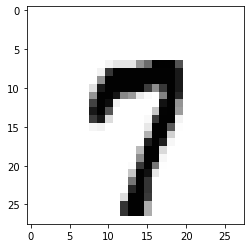

In [13]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
#     print('X_test.shape:', X_test.shape)
    Y_test = mnist_test.test_labels.to(device)
#     print('Y_test.shape:', Y_test.shape)
    
#     print('X_test:', X_test)
    prediction = linear(X_test)
#     print('prediction.shape:', prediction.shape)
#     print('prediction:', prediction)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()